In [1]:
# importar librerías

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [3]:
# cargar datos

df = pd.read_csv("./data_raw/articulos_ml.csv")

In [4]:
df.shape

(161, 8)

In [5]:
df.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [6]:
df.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


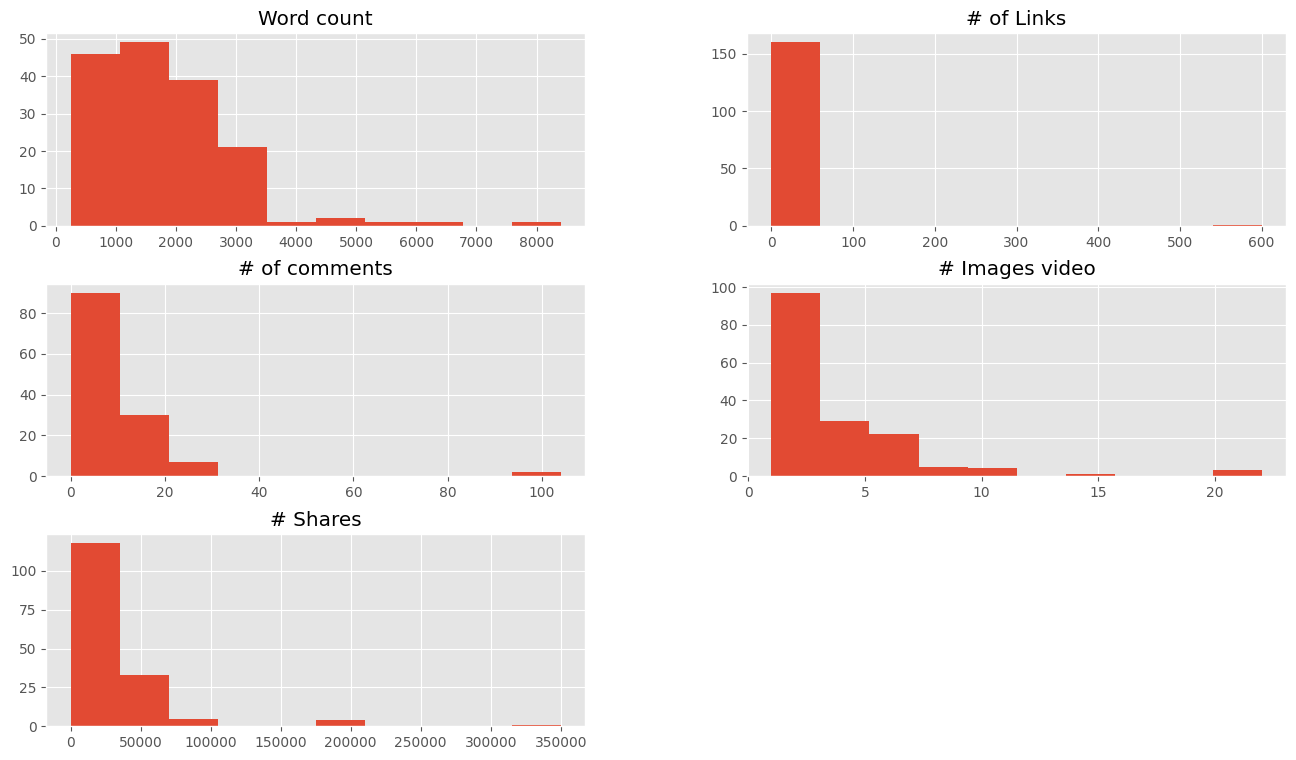

In [9]:
df.drop(['Title', 'url', 'Elapsed days'], axis=1).hist()
plt.show()

In [10]:
# filtrar los datos por conteo de palabras menor a 3500 y número de compartidas menor a 80000

df_filtered = df[(df['Word count'] <= 3500) & (df['# Shares'] <= 80000)]

colores = ['orange', 'blue']
tamanios = [30, 60]

f1 = df_filtered['Word count'].values
f2 = df_filtered['# Shares'].values

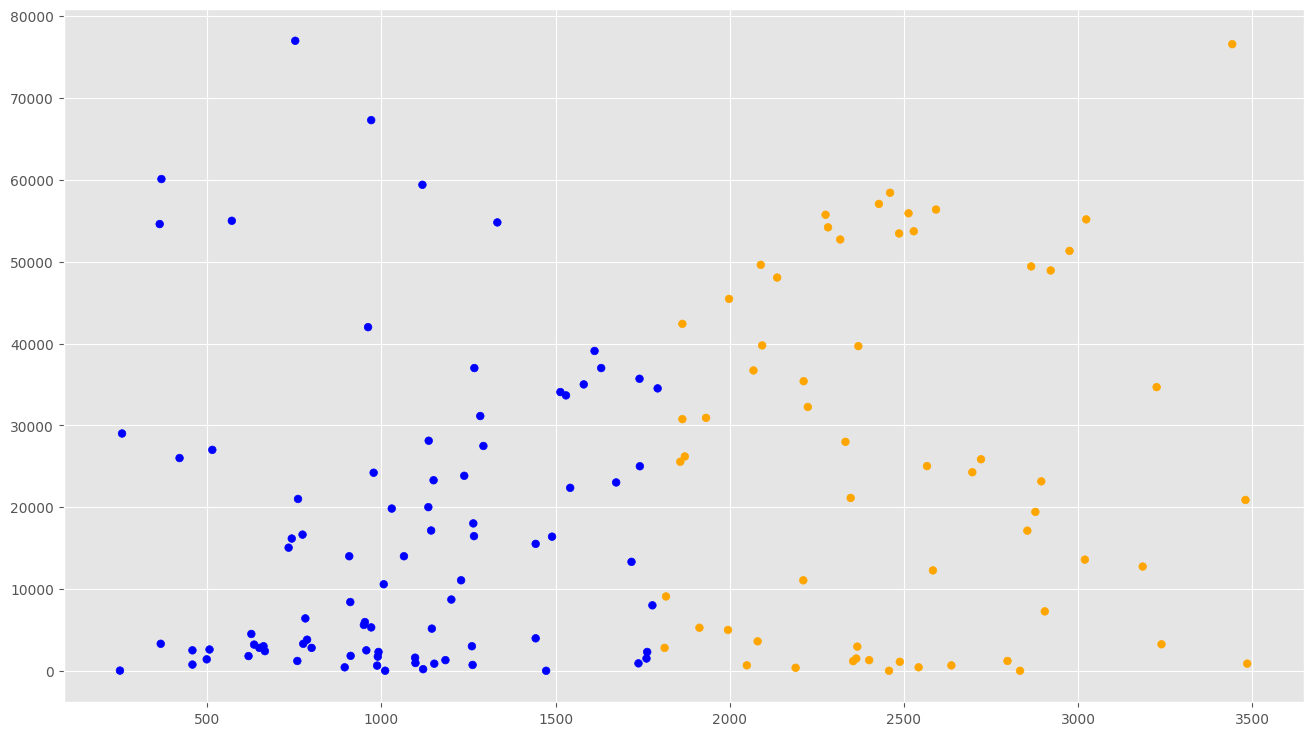

In [11]:
# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras

asignar = []
for index, row in df_filtered.iterrows():
    if (row['Word count'] > 1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [12]:
# regresión lineal simple

X_train = df_filtered['Word count'].values.reshape(-1, 1)
y_train = df_filtered['# Shares'].values

regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)

print('Coefficients: \n', regr.coef_)
print('Independent term: \n', regr.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [5.69765366]
Independent term: 
 11200.30322307416
Mean squared error: 372888728.34
Variance score: 0.06


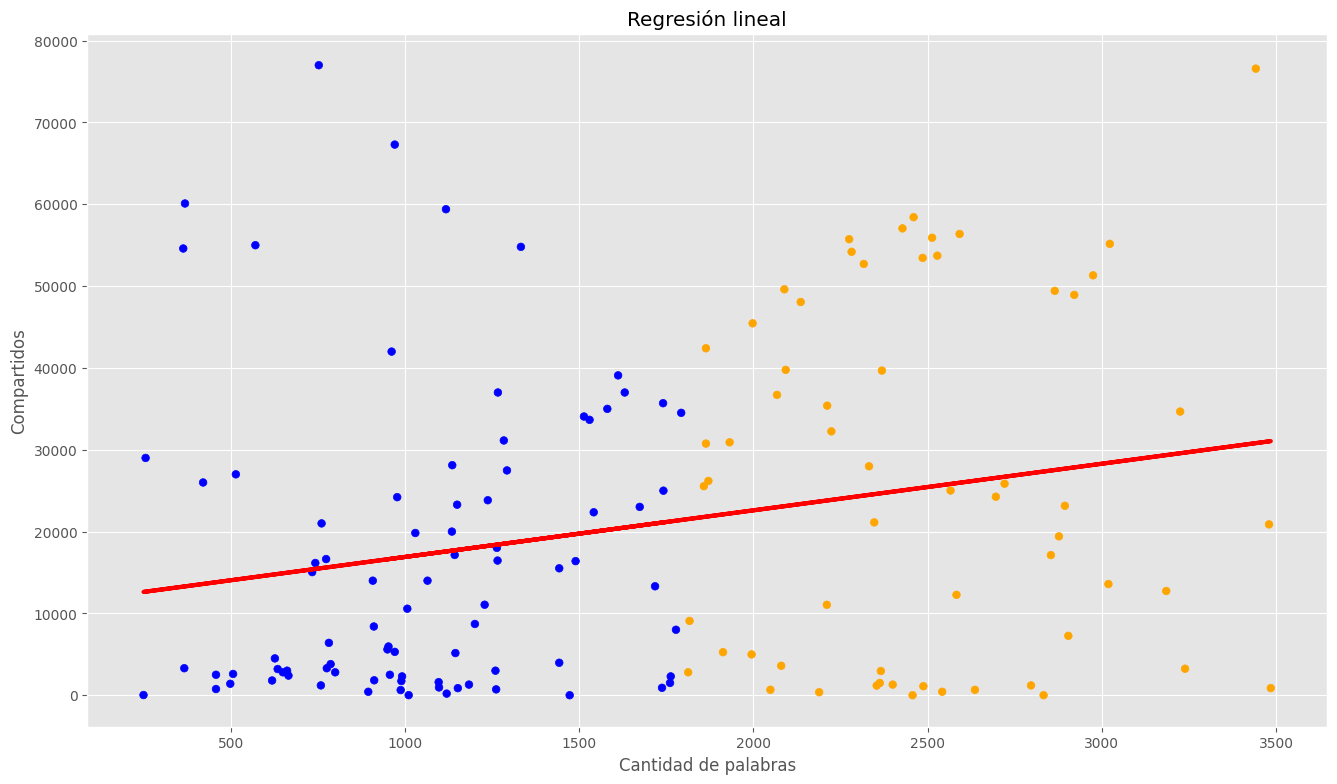

In [13]:
# graficar la linea de regresión

plt.scatter(X_train, y_train, c=asignar, s=tamanios[0])
plt.plot(X_train, y_pred, color='red', linewidth=3)
plt.xlabel('Cantidad de palabras')
plt.ylabel('Compartidos')
plt.title('Regresión lineal')
plt.show()

In [17]:
# predecir número de compartidos

y_dosmil = regr.predict([[2000]])
print(int(y_dosmil))

22595


C:\Users\ingen\AppData\Local\Temp\ipykernel_6248\2189447306.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(y_dosmil))
